## T-Bill Data Exploration

https://www.youtube.com/watch?v=Nbq5eyVk-0w&t=3407s

Purpose of this notebook is to determine if T Bills post higher returns at the end of each month.

Import Libraries

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

Store TLT values to a dataframe

stock.history(period='1mo', start=None, end=None)

In [65]:
ticker = "TLT"

stock = yf.Ticker(ticker)
df = stock.history(period='20y', start=None, end=None)

Add column for the % Return of each day

In [67]:
df["Return"] = (df['Close'] - df['Close'].shift(1))/df['Close']

df.style.format({
    'Return': '{:,.2%}'.format,
});

df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Return
Date,,,,,,,,,
2003-01-07 00:00:00-05:00,44.575466,44.865084,44.565120,44.766819,69800,0.0,0.0,0.0,NaN
2003-01-08 00:00:00-05:00,44.932338,45.066805,44.880621,44.989227,160100,0.0,0.0,0.0,0.004944
2003-01-09 00:00:00-05:00,44.565168,44.565168,43.970414,44.125568,237500,0.0,0.0,0.0,-0.019573
2003-01-10 00:00:00-05:00,44.435852,44.435852,44.022113,44.239326,145200,0.0,0.0,0.0,0.002571
2003-01-13 00:00:00-05:00,44.239321,44.409991,44.166917,44.311726,53300,0.0,0.0,0.0,0.001634


Group data by day of month

In [72]:
groupedByDay = df.groupby([df.index.day]).mean()

In [74]:
groupedByDay.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Return
Date,,,,,,,,,
1,90.084485,90.575496,89.615676,90.170395,9.450070e+06,0.285845,0.0,0.0,-0.000179
2,89.510408,89.931552,89.108541,89.510206,7.426431e+06,0.057442,0.0,0.0,-0.000676
3,89.086435,89.575333,88.660192,89.112159,8.397238e+06,0.053091,0.0,0.0,-0.001255
4,90.022634,90.389170,89.596987,90.004275,7.833304e+06,0.005808,0.0,0.0,0.000133
5,89.015384,89.367320,88.566035,88.935078,7.893688e+06,0.000000,0.0,0.0,-0.002875


Plot a Bar chart showing the returns by day of month

Text(0.5, 1.0, 'Mean close-toclose TLT returns by day of week 2013-2023')

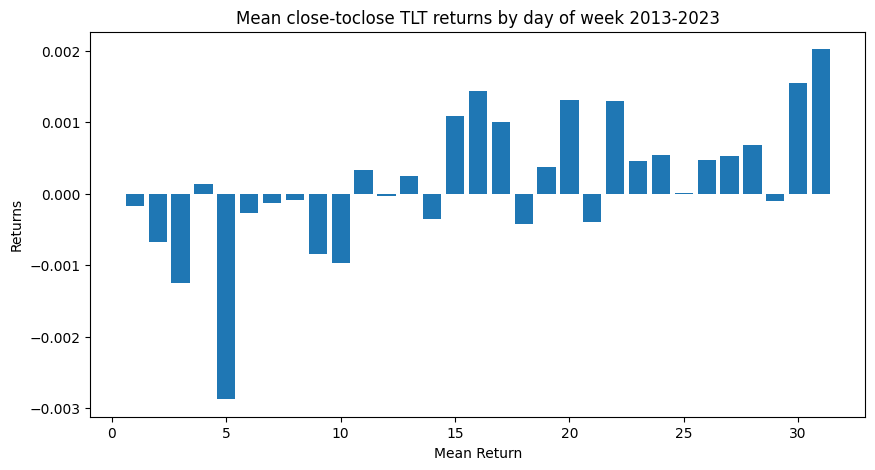

In [77]:
fig = plt.figure(figsize = (10,5))

plt.bar(groupedByDay.index, groupedByDay["Return"])

plt.xlabel("Mean Return")
plt.ylabel("Returns")
plt.title("Mean close-toclose TLT returns by day of week 2013-2023")

## To do
- Show the relationship between stock performance in a given month and the TLT returns
- Evaluate the results of a trading strategy that capitalizes on this effect

In [14]:
help(stock.history)

Help on method history in module yfinance.base:

history(period='1mo', interval='1d', start=None, end=None, prepost=False, actions=True, auto_adjust=True, back_adjust=False, repair=False, keepna=False, proxy=None, rounding=False, timeout=10, debug=True, raise_errors=False) -> pandas.core.frame.DataFrame method of yfinance.ticker.Ticker instance
    :Parameters:
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime.
            Default is 1900-01-01
        end: str
            Download end date string (YYYY-MM-DD) or _datetime.
            Default is now
        prepost : bool
            Include Pre and Post market data in results?
            Default is False
 